In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Entrenamiento_1.csv',dtype={
                    'Region': 'category',
                    'Territory': 'category',
                    'Bureaucratic_Code': 'category',
                    'Source': 'category',
                    'Billing_Country': 'category',
                    'Account_Name': 'category',
                    'Opportunity_Name': 'category',
                    'Account_Owner': 'category',
                    'Opportunity_Owner': 'category',
                    'Account_Type': 'category',
                    'Opportunity_Type': 'category',
                    'Quote_Type': 'category',
                    'Delivery_Terms': 'category',
                    'Brand': 'category',
                    'Product_Type': 'category',
                    'Size': 'category',
                    'Product_Category_B': 'category',
                    'Currency': 'category',
                    'Last_Activity': 'category',
                    'Last_Modified_By': 'category',
                    'Product_Family': 'category',
                    'Product_Name': 'category',
                    'ASP_Currency': 'category',
                    'ASP_(converted)_Currency': 'category',
                    'Delivery_Quarter': 'category',
                    'Total_Amount_Currency': 'category',
                    'Total_Taxable_Amount_Currency': 'category',
                    'Stage': 'category',
                    'Prod_Category_A': 'category',
                    'Total_Power_Discreet': 'category'
                })

In [7]:
df.head()

,Unnamed: 0,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Approval","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,...,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,0,27761,EMEA,None,True,True,True,True,False,Bureaucratic_Code_4,...,2016-05-01,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,1,27760,EMEA,None,False,False,False,False,False,Bureaucratic_Code_4,...,2016-01-01,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,2,27446,Americas,NW America,False,False,False,False,False,Bureaucratic_Code_4,...,2016-01-01,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,3,16808,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,...,2018-02-01,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,4,16805,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,...,2018-02-01,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
Unnamed: 0                                16947 non-null int64
ID                                        16947 non-null int64
Region                                    16947 non-null category
Territory                                 16947 non-null category
Pricing, Delivery_Terms_Quote_Approval    16947 non-null bool
Pricing, Delivery_Terms_Approved          16947 non-null bool
Bureaucratic_Code_0_Approval              16947 non-null bool
Bureaucratic_Code_0_Approved              16947 non-null bool
Submitted_for_Approval                    16947 non-null bool
Bureaucratic_Code                         16947 non-null category
Account_Created_Date                      16947 non-null object
Source                                    16947 non-null object
Billing_Country                           16947 non-null category
Account_Name                              16947 non-null catego

In [13]:
df['Territory'].value_counts()

None                    4999
Germany                 1682
NW America              1568
Australia               1208
India                    809
NE America               760
Japan                    681
Netherlands              533
SE America               493
France                   449
Singapore                441
United Kingdom           313
Belgium                  285
Italy                    283
Spain                    268
Central US               254
China (PRC)              218
SW America               206
Thailand                 173
Indonesia                154
Austria                  145
Philippines              109
Jordan                   102
Canada                    74
Luxembourg                70
Portugal                  66
Poland                    60
Vietnam                   51
Cyprus                    44
Denmark                   38
                        ... 
Kazakhstan                 7
Saudi Arabia               6
Malta                      6
Pakistan      

In [19]:
df.groupby(['Opportunity_Name','Stage']).agg({'Stage':'count'})

,,Stage
Opportunity_Name,Stage,
Opportunity_Name_0,Closed Lost,7
Opportunity_Name_1,Closed Lost,7
Opportunity_Name_100,Closed Won,1
Opportunity_Name_1000,Closed Lost,1
Opportunity_Name_10000,Closed Lost,1
Opportunity_Name_10001,Closed Won,1
Opportunity_Name_10002,Closed Lost,1
Opportunity_Name_10003,Closed Lost,1
Opportunity_Name_10005,Closed Lost,1


In [21]:
df['Account_Name'].value_counts()

Account_Name_1888    2124
Account_Name_1836     886
Account_Name_25       752
Account_Name_1991     586
Account_Name_1642     397
Account_Name_1508     355
Account_Name_1440     317
Account_Name_533      283
Account_Name_263      249
Account_Name_660      231
Account_Name_931      215
Account_Name_1994     152
Account_Name_1274     144
Account_Name_271      131
Account_Name_1757     127
Account_Name_1693     125
Account_Name_501      117
Account_Name_1067     116
Account_Name_1075     106
Account_Name_1448     101
Account_Name_1411      93
Account_Name_266       91
Account_Name_1794      91
Account_Name_1378      89
Account_Name_686       86
Account_Name_1468      84
Account_Name_1313      76
Account_Name_5         75
Account_Name_702       74
Account_Name_1100      73
                     ... 
Account_Name_469        1
Account_Name_1552       1
Account_Name_47         1
Account_Name_1550       1
Account_Name_470        1
Account_Name_472        1
Account_Name_475        1
Account_Name

In [23]:
##mas de un cliente tuvo muchas oportunidades
df.groupby(['Account_Name','Opportunity_Name','Stage']).agg({'Stage':'count'})

Stage
Account_Name      Opportunity_Name       Stage             
Account_Name_0    Opportunity_Name_7547  Closed Won       1
Account_Name_1    Opportunity_Name_11763 Closed Lost      1
Account_Name_10   Opportunity_Name_870   Closed Lost      1
Account_Name_100  Opportunity_Name_2262  Closed Won       1
                  Opportunity_Name_2273  Proposal         1
Account_Name_1000 Opportunity_Name_1582  Closed Lost      1
Account_Name_1001 Opportunity_Name_6198  Closed Won       1
Account_Name_1002 Opportunity_Name_6163  Closed Won       1
Account_Name_1004 Opportunity_Name_6208  Closed Lost      1
Account_Name_1006 Opportunity_Name_12272 Closed Lost      1
                  Opportunity_Name_1632  Closed Lost      1
                  Opportunity_Name_333   Closed Lost      1
                  Opportunity_Name_618   Closed Won       2
                  Opportunity_Name_7063  Closed Lost      1
                  Opportunity_Name_9909  Closed Lost      1
Account_Name_1008 Opportunity_Name_3929  Closed Lost      1
Account_Name_1009 Opportunity_Name_10857 Closed Lost      1
Account_Name_101  Opportunity_Name_2264  Closed Lost      1
                  Opportunity_Name_2265  Closed Lost      1
Account_Name_1010 Opportunity_Name_6218  Closed Lost      2
Account_Name_1011 Opportunity_Name_6176  Closed Lost      1
Account_Name_1012 Opportunity_Name_6173  Closed Lost      2
                  Opportunity_Name_6174  Closed Lost      1
                  Opportunity_Name_6186  Closed Lost      1
                  Opportunity_Name_6175  Closed Won       1
                  Opportunity_Name_6177  Closed Won       1
Account_Name_1014 Opportunity_Name_1226  Closed Lost      1
Account_Name_1015 Opportunity_Name_605   Closed Lost      2
Account_Name_1017 Opportunity_Name_10891 Closed Lost      1
                  Opportunity_Name_11627 Closed Won       1
...                                                     ...
Account_Name_1641 Opportunity_Name_8907  Closed Lost      1
                  Opportunity_Name_8908  Closed Lost      1
Account_Name_1692 Opportunity_Name_11128 Closed Lost      1
                  Opportunity_Name_11129 Closed Lost      1
Account_Name_1733 Opportunity_Name_11274 Closed Lost      1
Account_Name_1763 Opportunity_Name_11384 Closed Lost      1
Account_Name_184  Opportunity_Name_987   Closed Lost      1
Account_Name_185  Opportunity_Name_2558  Closed Lost      1
                  Opportunity_Name_2559  Closed Lost      1
Account_Name_194  Opportunity_Name_2587  Closed Lost      1
Account_Name_1977 Opportunity_Name_12107 Closed Lost      1
Account_Name_2049 Opportunity_Name_8719  Closed Lost      1
Account_Name_207  Opportunity_Name_2642  Closed Lost      1
Account_Name_394  Opportunity_Name_3742  Closed Lost      1
Account_Name_405  Opportunity_Name_157   Closed Won       1
Account_Name_408  Opportunity_Name_3776  Closed Lost      1
Account_Name_439  Opportunity_Name_5569  Closed Lost      1
                  Opportunity_Name_5570  Closed Lost      1
Account_Name_510  Opportunity_Name_2275  Closed Lost      1
Account_Name_623  Opportunity_Name_6879  Closed Lost      1
Account_Name_693  Opportunity_Name_296   Closed Lost      2
Account_Name_72   Opportunity_Name_1629  Closed Lost      1
Account_Name_726  Opportunity_Name_9245  Closed Won       3
Account_Name_736  Opportunity_Name_4912  Closed Lost      1
Account_Name_744  Opportunity_Name_5167  Closed Lost      2
Account_Name_776  Opportunity_Name_9028  Closed Lost      1
Account_Name_790  Opportunity_Name_12967 Closed Lost      1
Account_Name_892  Opportunity_Name_2633  Closed Lost      1
Account_Name_94   Opportunity_Name_6288  Closed Won       1
Account_Name_949  Opportunity_Name_299   Closed Lost      2

[9841 rows x 1 columns]

In [25]:
##vamos a evaluar que Stage tuvo en cada una
df.groupby(['Account_Name','Stage']).agg({'Stage':'count'})

Stage
Account_Name      Stage             
Account_Name_0    Closed Won       1
Account_Name_1    Closed Lost      1
Account_Name_10   Closed Lost      1
Account_Name_100  Closed Won       1
                  Proposal         1
Account_Name_1000 Closed Lost      1
Account_Name_1001 Closed Won       1
Account_Name_1002 Closed Won       1
Account_Name_1004 Closed Lost      1
Account_Name_1006 Closed Lost      5
                  Closed Won       2
Account_Name_1008 Closed Lost      1
Account_Name_1009 Closed Lost      1
Account_Name_101  Closed Lost      2
Account_Name_1010 Closed Lost      2
Account_Name_1011 Closed Lost      1
Account_Name_1012 Closed Lost      4
                  Closed Won       2
Account_Name_1014 Closed Lost      1
Account_Name_1015 Closed Lost      2
Account_Name_1017 Closed Lost      4
                  Closed Won       4
Account_Name_1018 Closed Lost      2
Account_Name_1020 Closed Lost      2
Account_Name_1021 Closed Lost      1
Account_Name_1022 Closed Lost      4
Account_Name_1023 Closed Lost      1
                  Closed Won       1
Account_Name_1024 Closed Won       2
Account_Name_1025 Closed Lost      1
...                              ...
Account_Name_1398 Closed Lost      1
Account_Name_1482 Closed Lost      1
Account_Name_1525 Closed Lost      1
Account_Name_1606 Closed Lost      6
Account_Name_1641 Closed Lost      3
Account_Name_1692 Closed Lost      2
Account_Name_1733 Closed Lost      1
Account_Name_1763 Closed Lost      1
Account_Name_184  Closed Lost      1
Account_Name_185  Closed Lost      2
Account_Name_194  Closed Lost      1
Account_Name_1977 Closed Lost      1
Account_Name_2049 Closed Lost      1
Account_Name_207  Closed Lost      1
Account_Name_394  Closed Lost      1
Account_Name_405  Closed Won       1
Account_Name_408  Closed Lost      1
Account_Name_439  Closed Lost      2
Account_Name_510  Closed Lost      1
Account_Name_623  Closed Lost      1
Account_Name_693  Closed Lost      2
Account_Name_72   Closed Lost      1
Account_Name_726  Closed Won       3
Account_Name_736  Closed Lost      1
Account_Name_744  Closed Lost      2
Account_Name_776  Closed Lost      1
Account_Name_790  Closed Lost      1
Account_Name_892  Closed Lost      1
Account_Name_94   Closed Won       1
Account_Name_949  Closed Lost      2

[2105 rows x 1 columns]

In [30]:
##Grupo de producto
df.groupby(['Opportunity_Name','Product_Family','Stage']).agg({'Stage':'count'})

,,,Stage
Opportunity_Name,Product_Family,Stage,
Opportunity_Name_0,Product_Family_78,Closed Lost,7
Opportunity_Name_1,Product_Family_78,Closed Lost,7
Opportunity_Name_100,Product_Family_85,Closed Won,1
Opportunity_Name_1000,Product_Family_77,Closed Lost,1
Opportunity_Name_10000,Product_Family_212,Closed Lost,1
Opportunity_Name_10001,Product_Family_151,Closed Won,1
Opportunity_Name_10002,Product_Family_201,Closed Lost,1
Opportunity_Name_10003,Product_Family_204,Closed Lost,1
Opportunity_Name_10005,Product_Family_164,Closed Lost,1


In [48]:
##Familias de productos 
familia_won_lost = df.loc[df['Stage']==('Closed Won' or 'Closed Lost'),['Region','Product_Family','Stage']]


In [39]:
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [50]:
##Nos quedamos con las familias de productos por region que fueron un exito y las que no, agregamos la columna total p
familia_won_lost['Count'] = 1
familia_won_lost.groupby(['Region','Product_Family','Stage']).agg({'Count':'sum'})

Count
Region      Product_Family     Stage            
APAC        Product_Family_100 Closed Won     51
            Product_Family_101 Closed Won      3
            Product_Family_102 Closed Won      1
            Product_Family_104 Closed Won      1
            Product_Family_106 Closed Won      1
            Product_Family_109 Closed Won     45
            Product_Family_110 Closed Won      5
            Product_Family_111 Closed Won      4
            Product_Family_114 Closed Won      1
            Product_Family_115 Closed Won     97
            Product_Family_116 Closed Won     26
            Product_Family_117 Closed Won      2
            Product_Family_119 Closed Won      1
            Product_Family_120 Closed Won      8
            Product_Family_122 Closed Won      1
            Product_Family_123 Closed Won     10
            Product_Family_125 Closed Won     11
            Product_Family_126 Closed Won     16
            Product_Family_127 Closed Won     23
            Product_Family_128 Closed Won     62
            Product_Family_129 Closed Won     16
            Product_Family_130 Closed Won      2
            Product_Family_131 Closed Won      3
            Product_Family_132 Closed Won    151
            Product_Family_133 Closed Won    149
            Product_Family_134 Closed Won      1
            Product_Family_137 Closed Won     13
            Product_Family_139 Closed Won     25
            Product_Family_140 Closed Won     97
            Product_Family_142 Closed Won      2
...                                          ...
Japan       Product_Family_78  Closed Won      1
            Product_Family_85  Closed Won     75
            Product_Family_9   Closed Won      8
            Product_Family_245 Closed Won      1
Middle East Product_Family_100 Closed Won      1
            Product_Family_109 Closed Won      2
            Product_Family_114 Closed Won      2
            Product_Family_115 Closed Won      2
            Product_Family_126 Closed Won      1
            Product_Family_127 Closed Won      1
            Product_Family_128 Closed Won      1
            Product_Family_140 Closed Won      1
            Product_Family_151 Closed Won      1
            Product_Family_152 Closed Won      1
            Product_Family_170 Closed Won      2
            Product_Family_173 Closed Won      2
            Product_Family_186 Closed Won      1
            Product_Family_187 Closed Won      6
            Product_Family_189 Closed Won      1
            Product_Family_195 Closed Won      1
            Product_Family_198 Closed Won      4
            Product_Family_202 Closed Won      1
            Product_Family_203 Closed Won      5
            Product_Family_204 Closed Won      3
            Product_Family_206 Closed Won      1
            Product_Family_215 Closed Won      5
            Product_Family_216 Closed Won      2
            Product_Family_61  Closed Won      1
            Product_Family_85  Closed Won      1
            Product_Family_92  Closed Won      1

[382 rows x 1 columns]

In [55]:
set_ = familia_won_lost.groupby(['Region','Product_Family','Stage']).agg({'Count':['sum']})
level0 = set_.columns.get_level_values(0)
level1 = set_.columns.get_level_values(1)
set_.columns= level0 + '_' + level1
set_ =set_.reset_index()
set_.head()

,Region,Product_Family,Stage,Count_sum
0,APAC,Product_Family_100,Closed Won,51
1,APAC,Product_Family_101,Closed Won,3
2,APAC,Product_Family_102,Closed Won,1
3,APAC,Product_Family_104,Closed Won,1
4,APAC,Product_Family_106,Closed Won,1


In [57]:
set_.sort_values(by='Count_sum',ascending=False)

,Region,Product_Family,Stage,Count_sum
154,Americas,Product_Family_133,Closed Won,452
326,Japan,Product_Family_226,Closed Won,351
240,EMEA,Product_Family_133,Closed Won,318
342,Japan,Product_Family_4,Closed Won,307
351,Japan,Product_Family_77,Closed Won,299
330,Japan,Product_Family_230,Closed Won,279
308,Japan,Product_Family_132,Closed Won,267
320,Japan,Product_Family_20,Closed Won,246
215,EMEA,Product_Family_100,Closed Won,239
282,EMEA,Product_Family_77,Closed Won,236


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1857: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


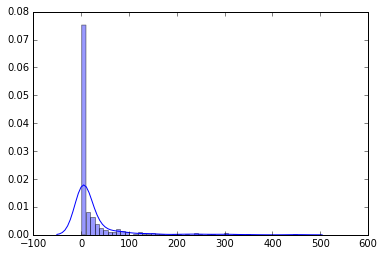

In [63]:
won_density = set_.loc[set_['Stage']=='Closed Won',['Count_sum']]
ax = sns.distplot(won_density)

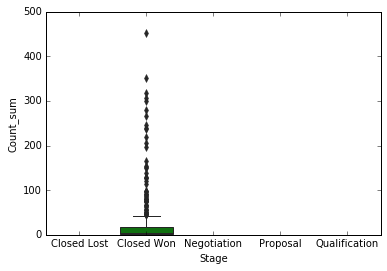

In [64]:
sns.boxplot(x="Stage", y="Count_sum", data=set_)


In [66]:
set_['Stage'].value_counts()

Closed Won       382
Qualification      0
Proposal           0
Negotiation        0
Closed Lost        0
Name: Stage, dtype: int64

In [76]:
df['Count'] = 1
set_ = df.groupby(['Region','Product_Family','Stage']).agg({'Count':['sum']})
level0 = set_.columns.get_level_values(0)
level1 = set_.columns.get_level_values(1)
set_.columns= level0 + '_' + level1
set_ =set_.reset_index()
set_.head()

,Region,Product_Family,Stage,Count_sum
0,APAC,Product_Family_100,Closed Lost,36
1,APAC,Product_Family_100,Closed Won,51
2,APAC,Product_Family_101,Closed Lost,1
3,APAC,Product_Family_101,Closed Won,3
4,APAC,Product_Family_102,Closed Lost,1


In [70]:
set_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 4 columns):
Region            764 non-null category
Product_Family    764 non-null category
Stage             764 non-null category
Count_sum         764 non-null int64
dtypes: category(3), int64(1)
memory usage: 21.2 KB


In [108]:
won = set_.loc[set_['Stage']=='Closed Won',['Region','Product_Family','Count_sum']]
lost = set_.loc[set_['Stage']=='Closed Lost',['Region','Product_Family','Count_sum']]

In [109]:
won['Region'].value_counts()

APAC           143
EMEA            77
Americas        72
Japan           64
Middle East     26
Name: Region, dtype: int64

In [110]:
lost['Region'].value_counts()

APAC           90
Americas       83
EMEA           71
Japan          58
Middle East    46
Name: Region, dtype: int64

In [111]:
##Necesito al menos los 10 primeros productos con mayor cantidad que este en todas las regiones
APAC = won.loc[won['Region']=='APAC',['Region','Product_Family','Count_sum']].nlargest(10,'Count_sum')
EMEA =  won.loc[won['Region']=='EMEA',['Region','Product_Family','Count_sum']].nlargest(10,'Count_sum')
Americas = won.loc[won['Region']=='Americas',['Region','Product_Family','Count_sum']].nlargest(10,'Count_sum')
Japan = won.loc[won['Region']=='Japan',['Region','Product_Family','Count_sum']].nlargest(10,'Count_sum')
Middle_East = won.loc[won['Region']=='Middle East',['Region','Product_Family','Count_sum']].nlargest(10,'Count_sum')

In [112]:
won = (((APAC.append(EMEA)).append(Americas)).append(Japan)).append(Middle_East)

won

,Region,Product_Family,Count_sum
40,APAC,Product_Family_132,151
42,APAC,Product_Family_133,149
122,APAC,Product_Family_212,127
203,APAC,Product_Family_77,120
16,APAC,Product_Family_115,97
49,APAC,Product_Family_140,97
116,APAC,Product_Family_208,81
33,APAC,Product_Family_128,62
1,APAC,Product_Family_100,51
75,APAC,Product_Family_170,49


In [96]:
won = won.pivot("Region", "Product_Family", "Count_sum")

In [97]:

ax = sns.heatmap(won,linewidths=.5,ax=ax)

ax.set_title("",fontsize=20)
ax.set_xlabel("Region",fontsize=15)
ax.set_ylabel("Familia de Productos",fontsize=15)

In [75]:
set_.groupby(['Region','Product_Family','Count_sum']).agg({'Count_sum':['mean']})

Count_sum
                                              mean
Region      Product_Family     Count_sum          
APAC        Product_Family_100 36               36
                               51               51
            Product_Family_101 1                 1
                               3                 3
            Product_Family_102 1                 1
            Product_Family_104 1                 1
            Product_Family_106 1                 1
            Product_Family_109 32               32
                               45               45
            Product_Family_110 5                 5
                               18               18
            Product_Family_111 1                 1
                               4                 4
            Product_Family_114 1                 1
            Product_Family_115 27               27
                               97               97
            Product_Family_116 8                 8
                               26               26
            Product_Family_117 1                 1
                               2                 2
            Product_Family_119 1                 1
            Product_Family_120 8                 8
            Product_Family_122 1                 1
            Product_Family_123 10               10
            Product_Family_125 10               10
                               11               11
            Product_Family_126 1                 1
                               16               16
            Product_Family_127 23               23
                               35               35
...                                            ...
Middle East Product_Family_195 3                 3
            Product_Family_196 2                 2
            Product_Family_198 1                 1
                               4                 4
            Product_Family_201 1                 1
            Product_Family_202 1                 1
            Product_Family_203 1                 1
                               5                 5
                               6                 6
            Product_Family_204 3                 3
            Product_Family_206 1                 1
                               2                 2
            Product_Family_207 3                 3
            Product_Family_208 1                 1
                               3                 3
            Product_Family_209 4                 4
            Product_Family_212 4                 4
            Product_Family_215 1                 1
                               5                 5
                               13               13
            Product_Family_216 2                 2
            Product_Family_61  1                 1
            Product_Family_67  1                 1
            Product_Family_77  4                 4
            Product_Family_79  1                 1
            Product_Family_85  1                 1
                               3                 3
            Product_Family_92  1                 1
            Product_Family_94  1                 1
            Product_Family_98  1                 1

[728 rows x 1 columns]

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 53 columns):
Unnamed: 0                                16947 non-null int64
ID                                        16947 non-null int64
Region                                    16947 non-null category
Territory                                 16947 non-null category
Pricing, Delivery_Terms_Quote_Approval    16947 non-null bool
Pricing, Delivery_Terms_Approved          16947 non-null bool
Bureaucratic_Code_0_Approval              16947 non-null bool
Bureaucratic_Code_0_Approved              16947 non-null bool
Submitted_for_Approval                    16947 non-null bool
Bureaucratic_Code                         16947 non-null category
Account_Created_Date                      16947 non-null object
Source                                    16947 non-null object
Billing_Country                           16947 non-null category
Account_Name                              16947 non-null catego

In [101]:
df.groupby(['Region','Month']).agg({'Total_Amount':['mean']})

Total_Amount
                                mean
Region      Month                   
APAC        2016-01-01  4.660892e+05
            2016-02-01  8.482109e+05
            2016-03-01  5.385116e+05
            2016-04-01  9.305748e+05
            2016-05-01  9.009557e+05
            2016-06-01  3.731666e+05
            2016-07-01  4.498865e+05
            2016-08-01  7.023237e+05
            2016-09-01  3.432028e+05
            2016-10-01  1.556019e+06
            2016-11-01  3.980830e+05
            2016-12-01  8.876692e+05
            2017-01-01  5.036100e+05
            2017-02-01  8.932306e+05
            2017-03-01  1.095046e+06
            2017-04-01  1.067733e+06
            2017-05-01  4.255231e+05
            2017-06-01  4.001953e+05
            2017-07-01  1.127179e+06
            2017-08-01  8.737057e+05
            2017-09-01  1.464008e+06
            2017-10-01  3.013991e+06
            2017-11-01  6.266175e+05
            2017-12-01  1.563996e+05
            2018-01-01  2.585485e+06
            2018-02-01  9.225932e+05
            2018-03-01  1.213152e+06
            2018-04-01  8.600426e+05
            2018-05-01  3.486351e+05
            2018-06-01  1.381493e+06
...                              ...
Middle East 2016-07-01  3.801702e+06
            2016-11-01  4.060538e+05
            2016-12-01  4.479875e+05
            2017-01-01  5.644170e+04
            2017-03-01  1.275389e+05
            2017-04-01  3.126906e+06
            2017-05-01  1.933503e+05
            2017-06-01  1.999425e+05
            2017-07-01  1.094645e+05
            2017-08-01  2.997413e+05
            2017-09-01  6.729168e+05
            2017-10-01  7.822982e+06
            2017-11-01  2.107904e+07
            2017-12-01  2.129259e+07
            2018-01-01  1.260255e+07
            2018-02-01  3.190238e+05
            2018-03-01  7.572457e+05
            2018-04-01  4.470834e+05
            2018-05-01  1.389570e+05
            2018-06-01  1.273700e+05
            2018-07-01  1.156590e+05
            2018-08-01  2.693329e+05
            2018-09-01  9.716890e+04
            2018-10-01  1.632868e+05
            2018-11-01  1.450102e+05
            2018-12-01  2.504250e+05
            2019-01-01  9.006317e+04
            2019-02-01  4.121350e+05
            2019-03-01  5.710716e+05
            2019-04-01  1.897830e+06

[217 rows x 1 columns]

In [106]:
set_2 = df.groupby(['Region','Month']).agg({'Total_Amount':'mean'}).reset_index()


In [107]:
set_2 = set_2.pivot("Region", "Month", "Total_Amount")
ax = sns.heatmap(set_2,linewidths=.5,ax=ax)

ax.set_title("Promedio de la cantidad depalabras de un tweet según ubicación y palabra clave",fontsize=20)
ax.set_xlabel("Ubicación de un tweet",fontsize=15)
ax.set_ylabel("Palabra clave",fontsize=15)

In [113]:
df.groupby(['Opportunity_ID','Stage']).agg({'Total_Amount':['mean']})

,,Total_Amount
,,mean
Opportunity_ID,Stage,
0,Closed Lost,5.272800e+06
1,Closed Won,4.823000e+04
2,Closed Won,8.386560e+04
3,Closed Lost,7.421882e+06
4,Closed Lost,1.335719e+07
5,Closed Lost,1.483828e+07
6,Closed Lost,2.659495e+06
7,Closed Won,5.068800e+04


In [126]:
#me quedo solo con las oportunidades 
nuevo = df.drop_duplicates(subset = ["Opportunity_ID"])

In [127]:
nuevo['Stage'].value_counts()

Closed Won       5072
Closed Lost      4719
Proposal           30
Negotiation        11
Qualification       9
Name: Stage, dtype: int64

In [128]:
nuevo['tot'] = 1
#nuevo=nuevo.groupby('Stage').agg({'tot':['sum']})
#level0 = nuevo.columns.get_level_values(0)
#level1 = nuevo.columns.get_level_values(1)
#nuevo.columns= level0 + '_' + level1
#nuevo =nuevo.reset_index()
#nuevo.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


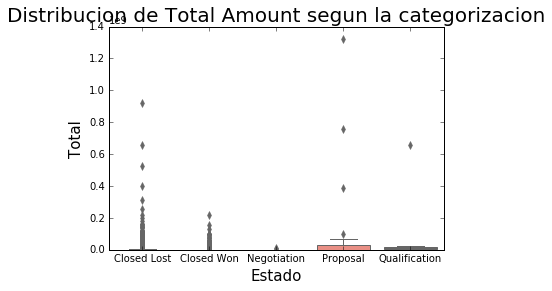

In [133]:
g = sns.boxplot(x="Stage", y="Total_Amount", data=nuevo, palette="Set3")
g.set_title("Distribucion de Total Amount segun la categorizacion",fontsize=20)
g.set_xlabel("Estado", fontsize=15)
g.set_ylabel("Total",fontsize=15)

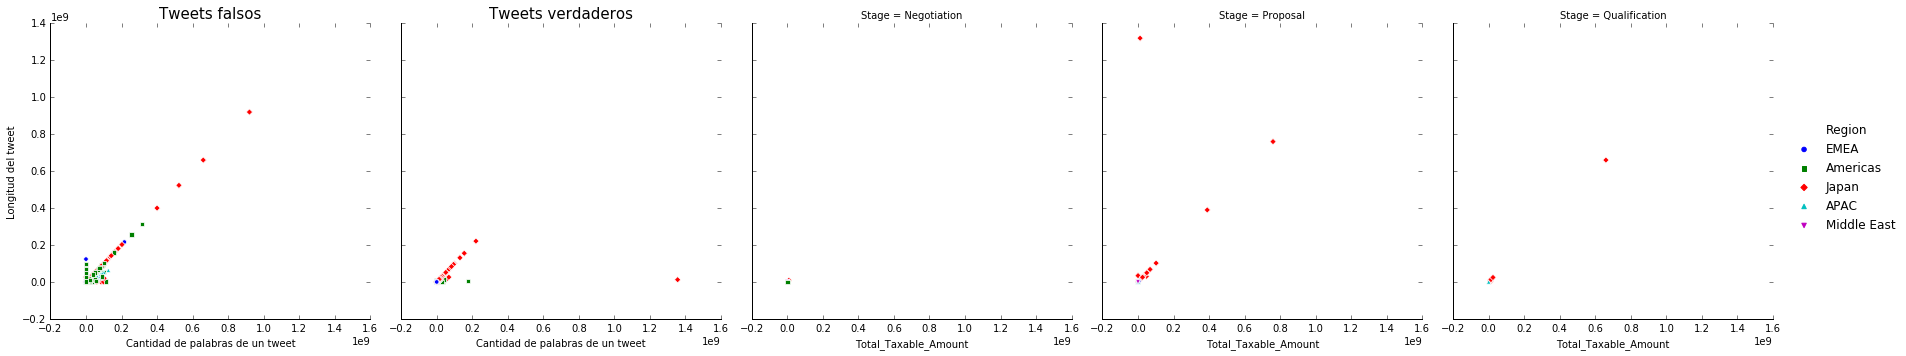

In [136]:
g = sns.relplot(x="Total_Taxable_Amount", y="Total_Amount",
              col="Stage", hue="Region", style="Region", 
            kind="scatter", data=nuevo).axes.flatten()


g[0].set_title("Tweets falsos",fontsize=15)
g[1].set_title("Tweets verdaderos",fontsize=15)
g[0].set_ylabel("Longitud del tweet",fontsize=10)
g[0].set_xlabel("Cantidad de palabras de un tweet",fontsize=10)
g[1].set_xlabel("Cantidad de palabras de un tweet",fontsize=10)